### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import re
import operator
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import inaugural
from wordcloud import WordCloud, STOPWORDS 

### Function to calculate percentages of words and print frequencies and percentages

In [2]:
def perc(d):
    perc = {}
    for key, value in d.items():
        newvalue = round(value/len(preprocessed_text)*100, 2)
        perc[key]= newvalue
        print(str(key)+','+str(value)+','+str(newvalue)+','+' ,')
    #print(perc)

### Removing the numbers and splitting the data into words(containing only letters)

In [3]:
df = pd.read_csv('RNA.csv')
#print(df.head(5))
x1 = df['title..4'].values

df2 = pd.read_csv('Microarray.csv')
#print(df.head(5))
x2 = df2['title..4'].values

x = np.concatenate((x1,x2))
print(len(x))

#print(x[:10], sep = ',')

pattern_to_find1 = "[^a-zA-Z0-9 ]"
pattern_to_repl1 = " "
pattern_to_find2 = "[^a-zA-Z ]";
pattern_to_repl2 = ""

preprocessed_text = []
total_string_labels = ''
for sample in x:
    try:
        pre_txt = re.sub(pattern_to_find1, pattern_to_repl1, sample)
        pre_txt = re.sub(pattern_to_find2, pattern_to_repl2, pre_txt).lower()
        total_string_labels+=pre_txt
    #     print(pre_txt.strip())
        preprocessed_text.extend(pre_txt.strip().split())
    except:
        continue    
#preprocessed_text = [x for x in preprocessed_text if len(x)!=1]
print(len(preprocessed_text))
print('')

1796150
6663851



### Calculating frequencies of words in the list

In [4]:
# print(total_string_labels)

counts = Counter(preprocessed_text)
print(len(counts))
#print(counts)
print('')

68082



### Keeping only words with freq > 100 and splitting it into 1, 2, 3, >3 lettered labels 

In [5]:
# 
d_100 = dict((k, v) for k, v in counts.items() if v >= 100)
sorted_d_100 = dict( sorted(d_100.items(), key=operator.itemgetter(1),reverse=True))
#perc_d_100 = dict((k, (v/len(preprocessed_text)*100) ) for k, v in sorted_d_100)
print(len(sorted_d_100))
#print(sorted_d_100)    
#perc(sorted_d_100)

sorted_d_100_single = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 1)
print('1 letter ', len(sorted_d_100_single))
#print(sorted_d_100_single)
#perc(sorted_d_100_single)

sorted_d_100_double = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 2)
print('2 letters ', len(sorted_d_100_double))
#print(sorted_d_100_double)
#perc(sorted_d_100_double)

sorted_d_100_triple = dict((k,v) for k, v in sorted_d_100.items() if len(k) == 3)
print('3 letters ', len(sorted_d_100_triple))
#print(sorted_d_100_triple)
#perc(sorted_d_100_triple)

sorted_d_100_more = dict((k,v) for k, v in sorted_d_100.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_100_more))
#print(sorted_d_100_more)
#perc(sorted_d_100_more)

4916
1 letter  26
2 letters  514
3 letters  1374
more than 3 letters  3002


### Keeping only words with freq > 300 and splitting it into 1, 2, 3, >3 lettered labels

In [6]:
print('')

d_300 = dict((k, v) for k, v in counts.items() if v >= 300)
sorted_d_300 = dict( sorted(d_300.items(), key=operator.itemgetter(1),reverse=True))
print(len(sorted_d_300))
#print(sorted_d_300)
#perc(sorted_d_300)

sorted_d_300_single = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 1)
print('1 letter ', len(sorted_d_300_single))
#print(sorted_d_300_single)
#perc(sorted_d_300_single)

sorted_d_300_double = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 2)
print('2 letters ', len(sorted_d_300_double))
#print(sorted_d_300_double)
#perc(sorted_d_300_double)

sorted_d_300_triple = dict((k,v) for k, v in sorted_d_300.items() if len(k) == 3)
print('3 letters ', len(sorted_d_300_triple))
#print(sorted_d_300_triple)
#perc(sorted_d_300_triple)

sorted_d_300_more = dict((k,v) for k, v in sorted_d_300.items() if len(k) > 3)
print('more than 3 letters ', len(sorted_d_300_more))
#print(sorted_d_300_more)
#perc(sorted_d_300_more)


2111
1 letter  26
2 letters  392
3 letters  503
more than 3 letters  1190


### Summary

Total number of samples = 1796150


Total number of words generated = 6663851


Total number of labels = 68082


Total number of labels with frequency > 100 = 4916 (Entire list alongwith percentages with appropriate segregation in combined_rep(freq>100).csv)

1 letter labels = 26 <br />
2 letters labels = 514 <br />
3 letters  labels = 1374 <br />
more than 3 letters labels = 3002 <br />


Total number of labels with frequency > 300 = 2111 (Entire list alongwith percentages with appropriate segregation in combined_rep(freq>300).csv)

1 letter labels = 26 <br />
2 letters labels = 392 <br />
3 letters = 503 <br />
more than 3 letters labels = 1190 <br />


Observations about the data sets:<br />
1) There are some labels where numbers are important and others where they are not. This analysis is after removing numbers from the labels.<br />
2) Some labels contain words like pH7.4 and pH6.3 which before removing numbers are different and after, come under the same category. But actually they seem to have different and important context.
3) Same is true for labels having time, like 6weeks, 4weeks or 24hours, 12hours which when deprived of numbers are just weeks and hours.<br />
3) Some labels like 3415134 are such that numbers don't seem significant but then removing numbers is equivalent to removing the entire data point.<br />
4) Some labels are just single letters and numbers, e.g., A12 or B34, which when deprived of numbers or single letters, disappear completely. Will have to look into these.<br />

New observations:<br />
1)Some labels are non-strings<br />
2)Some are smaller numbers eg 2,3,4,5,...<br />
3)Some labels contain special characters like '[',']' of which importance is unknown<br /> 

#### Top 60 words

##### With 1 lettered labels

In [7]:
d_df = pd.DataFrame.from_dict(sorted_d_300, orient='index', columns=['Freq'])
d_df.head(60)

Freq
rep         290759
h           125551
replicate    99247
s            90630
c            89408
d            78441
cell         77782
a            76985
p            73558
control      72200
b            71557
sample       67552
biological   64795
e            63721
t            56296
wt           55015
patient      48543
day          45891
r            45113
vs           43948
f            43439
seq          42423
cells        42123
m            41310
liver        38577
rna          36753
l            33583
n            33229
cd           32593
from         31349
of           31334
hr           31167
tumor        30196
blood        29993
single       29960
g            29890
mouse        29685
x            28129
at           26894
with         26648
treated      26449
cy           24419
subject      21401
tissue       19456
in           18494
cancer       18365
w            18110
human        17515
lung         16420
male         16283
i            16169
na           16100
min          15783
pool         15626
exp          15388
ko           15334
normal       15249
v            14917
female       14827
days         14718

##### Without 1 lettered labels

In [8]:
sorted_d_300_w = dict((k, v) for k, v in sorted_d_300.items() if len(k)!=1)
d_df = pd.DataFrame.from_dict(sorted_d_300_w, orient='index', columns=['Freq'])
d_df.head(60)

Freq
rep         290759
replicate    99247
cell         77782
control      72200
sample       67552
biological   64795
wt           55015
patient      48543
day          45891
vs           43948
seq          42423
cells        42123
liver        38577
rna          36753
cd           32593
from         31349
of           31334
hr           31167
tumor        30196
blood        29993
single       29960
mouse        29685
at           26894
with         26648
treated      26449
cy           24419
subject      21401
tissue       19456
in           18494
cancer       18365
human        17515
lung         16420
male         16283
na           16100
min          15783
pool         15626
exp          15388
ko           15334
normal       15249
female       14827
days         14718
type         13878
srx          13506
treatment    13210
chip         13146
brain        13110
breast       13093
comb         12650
non          12429
mgh          11818
time         11807
mg           11749
hours        11675
primary      11653
muscle       11631
mm           11567
line         11231
pbmc         11215
wild         11067
for          11023

### Frequency Plots

#### Bar chart : 1 lettered labels

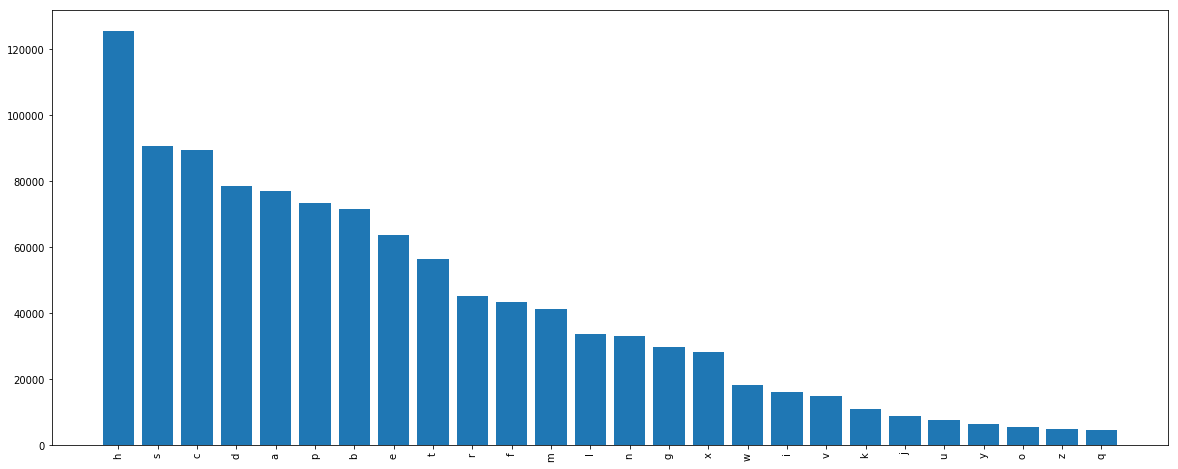

In [9]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(sorted_d_300_single.keys(), sorted_d_300_single.values())

plt.show()

#### Bar chart : 2 lettered labels(top 100)

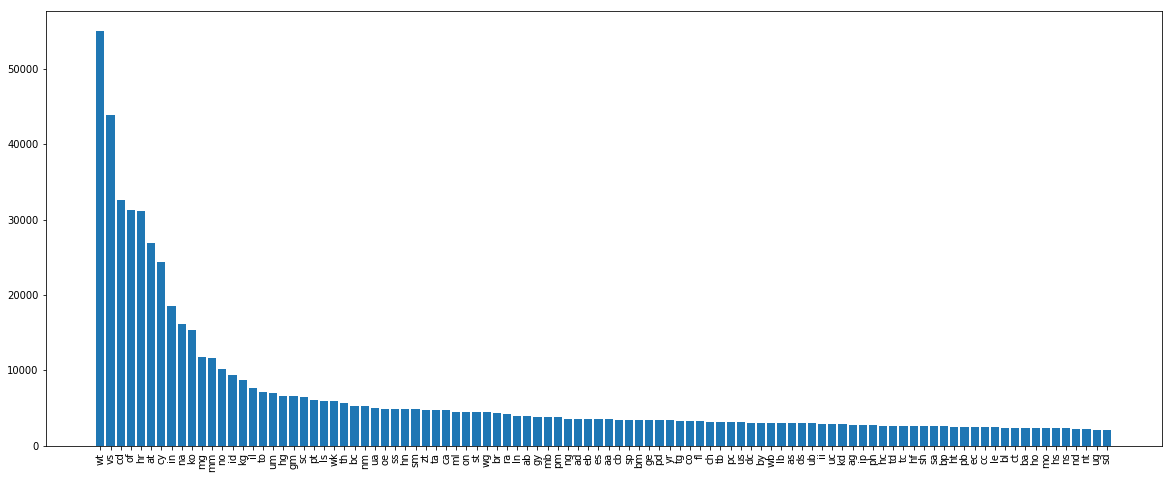

In [10]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_double.keys())[:100], list(sorted_d_300_double.values())[:100])

plt.show()

#### Bar chart : 3 lettered labels(top 100)

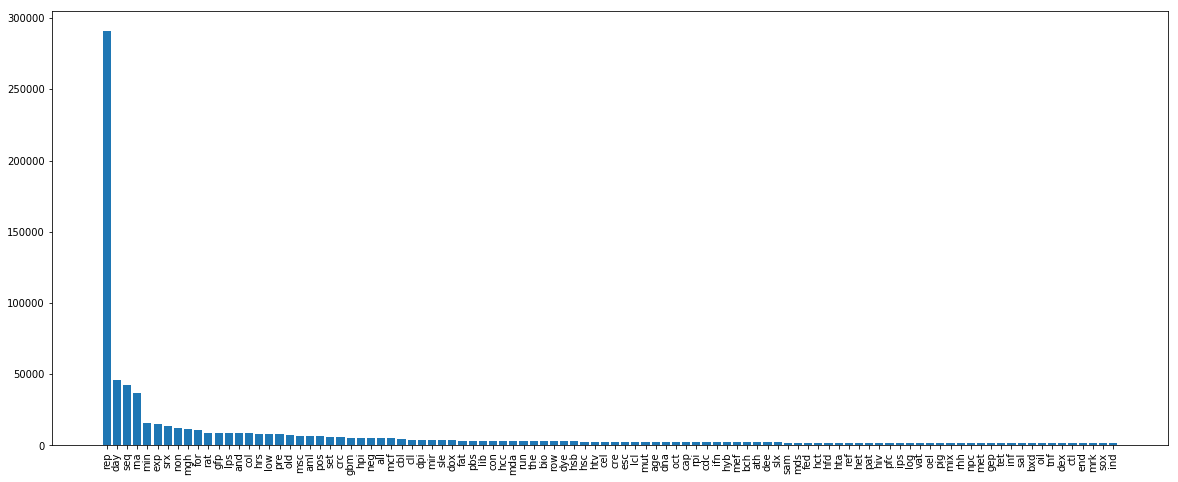

In [11]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_triple.keys())[:100], list(sorted_d_300_triple.values())[:100])

plt.show()

#### Bar chart : >3 lettered labels(top 100)

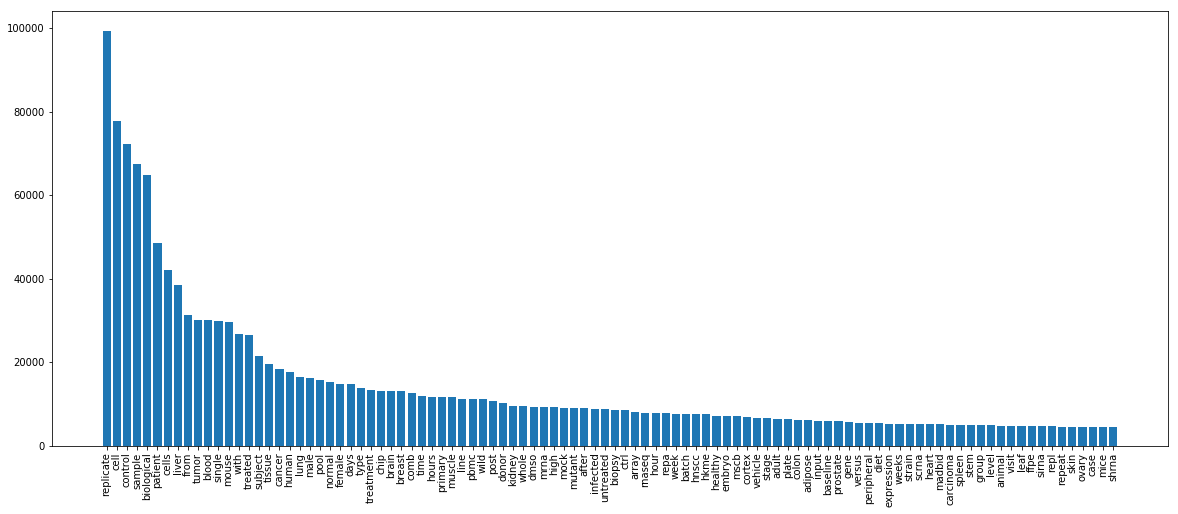

In [12]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
plt.xticks(rotation='vertical')
plt.bar(list(sorted_d_300_more.keys())[:100], list(sorted_d_300_more.values())[:100])

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 5000)

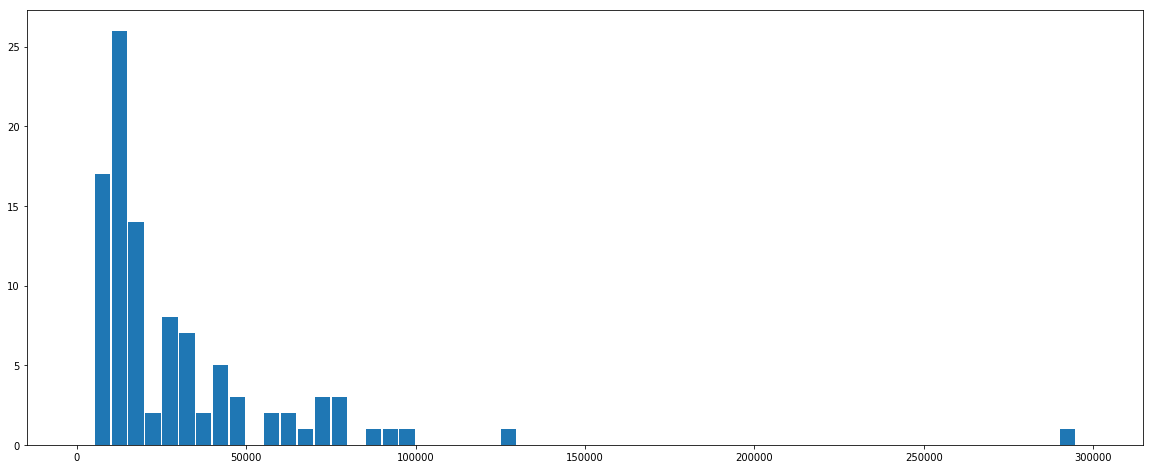

In [13]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*5000 for x in range(0,61)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

#### Histogram : Top 100 words by frequency (Bin size 10000)

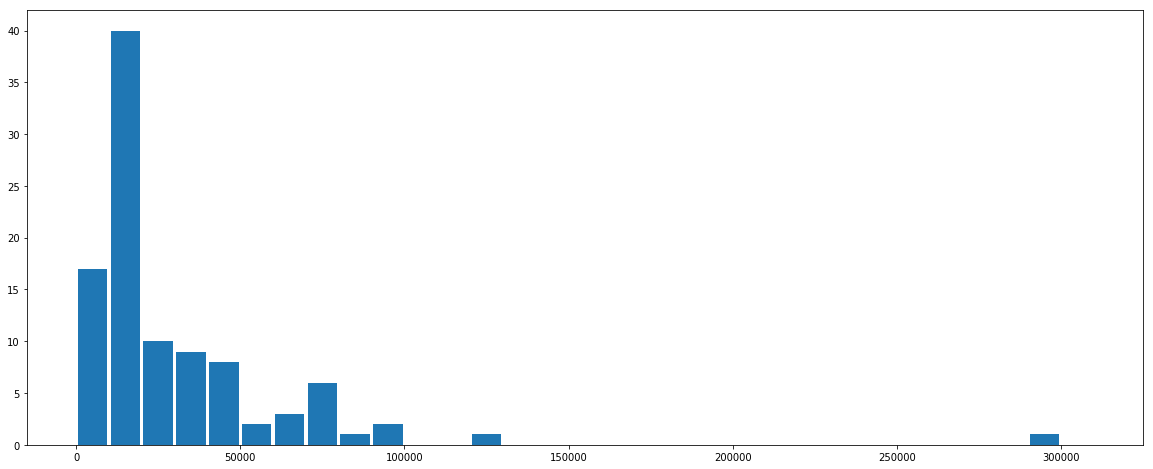

In [14]:
%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 8]
bins = [x*10000 for x in range(0,32)]
plt.hist(list(sorted_d_300.values())[:100], bins, rwidth=0.9)

plt.show()

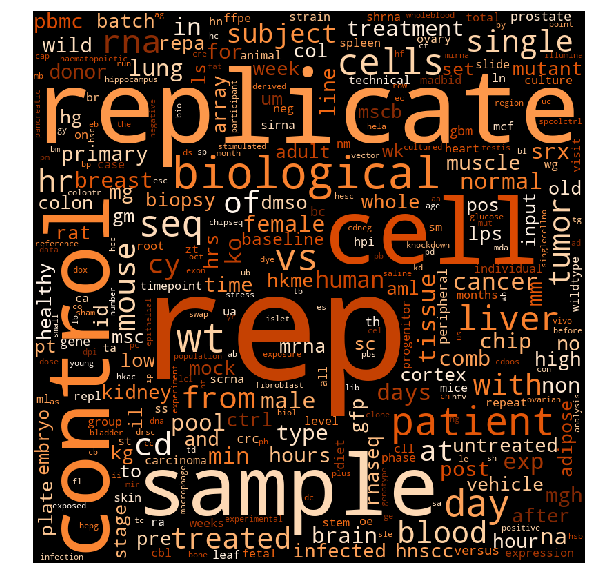

In [15]:
%matplotlib inline

stopwords = set(STOPWORDS) 

d_300 = dict((k, v) for k, v in d_300.items() if len(k)!=1)

# wordcloud = WordCloud().generate(total_string_labels) 
wordcloud =  WordCloud(width = 800, height = 800, 
                colormap="Oranges_r", max_words=1000,
                min_font_size = 10).generate_from_frequencies(d_300)
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

plt.show()